### Heroes Of Pymoli Data Analysis
* Of the 1163 active players, the vast majority are male (84%). There also exists, a smaller, but notable proportion of female players (14%).

* Our peak age demographic falls between 20-24 (44.8%) with secondary groups falling between 15-19 (18.60%) and 25-29 (13.4%).  
-----

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import pandas as pd

# File to Load (Remember to Change These)
file_to_load = "Resources/purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)
purchase_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


## Player Count

* Display the total number of players


In [2]:
player_count_df = purchase_data["SN"].nunique()
player_count_df


576

## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [3]:
unique_items_df = purchase_data["Item ID"].nunique()
print(unique_items_df)
avg_price_df = round(purchase_data["Price"].mean(),2)
avg_price_df
ttl_revenue_df = round(purchase_data["Price"].sum(),2)
ttl_revenue_df
summary_df = pd.DataFrame({"Players": [player_count_df],
                                   "Avg Price": [avg_price_df],
                                   "$ Revenue": [ttl_revenue_df],})
summary_df


179


,Players,Avg Price,$ Revenue
0,576,3.05,2379.77


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




 Total: 780
 Male: 652
 Female: 113
 non_specfic: 15
 % Male: 83.59
 % Female: 14.49
 % non_specifc: 1.92
Gender
Female                   3.203009
Male                     3.017853
Other / Non-Disclosed    3.346000
Name: Price, dtype: float64
Gender
Female                    361.94
Male                     1967.64
Other / Non-Disclosed      50.19
Name: Price, dtype: float64


Text(0.5, 1.0, 'Purchase Dollars by Gender')

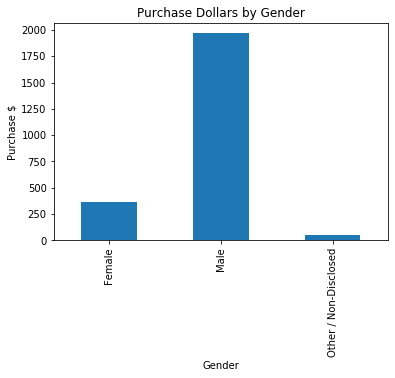

In [97]:
total_gender = purchase_data["Gender"].count()
male = purchase_data["Gender"].value_counts()['Male']
female = purchase_data["Gender"].value_counts()['Female']
non_gender_specific = total_gender - male - female
print(f" Total: {total_gender}\n Male: {male}\n Female: {female}\n non_specfic: {non_gender_specific}")
male_pct = round((male/total_gender) * 100,2)
female_pct = round((female/total_gender) * 100,2)
non_gender_specific_pct = round((non_gender_specific/total_gender) * 100,2)
print(f" % Male: {male_pct}\n % Female: {female_pct}\n % non_specifc: {non_gender_specific_pct}")
purchase_count = purchase_data["Price"].count()
group_gender_df = purchase_data.groupby("Gender")
group_person_df = purchase_data.groupby("SN")
group_gender_df.head()
group_gender_avg_price_df = group_gender_df["Price"].mean()
group_gender_purchase_total = group_gender_df["Price"].sum()
group_gender_purchase_count = group_gender_df["Price"].count()
print(group_gender_avg_price_df)
print(group_gender_purchase_total.head())
group_gender_purchase_total.plot.bar()
plt.xlabel('Gender')
plt.ylabel("Purchase $")
plt.title("Purchase Dollars by Gender")


## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [5]:
merge_df = pd.merge(group_gender_avg_price_df, group_gender_purchase_total, on="Gender")
merge_df=pd.merge(merge_df,group_gender_purchase_count,on="Gender")
merge_df = merge_df.rename(columns={"Price_x":"Avg Price","Price_y":"Purchased total($)","Price":"#Purchases"})
merge_df["Avg Price"] = merge_df["Avg Price"].map("${0:,.2f}".format)
merge_df["Purchased total($)"]=merge_df["Purchased total($)"].map("${0:,.2f}".format)
print(merge_df.head())

                      Avg Price Purchased total($)  #Purchases
Gender                                                        
Female                    $3.20            $361.94         113
Male                      $3.02          $1,967.64         652
Other / Non-Disclosed     $3.35             $50.19          15


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


           Purchases Purchased total($)  Individuals per_person_avg percent  \
Age Group                                                                     
<10               23             $77.13           17          $4.54   3.24%   
10-14             28             $82.78           22          $3.76   3.48%   
15-19            136            $412.89          107          $3.86  17.35%   
20-24            365          $1,114.06          258          $4.32  46.81%   
25-29            101            $293.00           77          $3.81  12.31%   

          Avg Price  
Age Group            
<10           $3.35  
10-14         $2.96  
15-19         $3.04  
20-24         $3.05  
25-29         $2.90  


Text(0.5, 1.0, 'Age Group % Purchase Dollars')

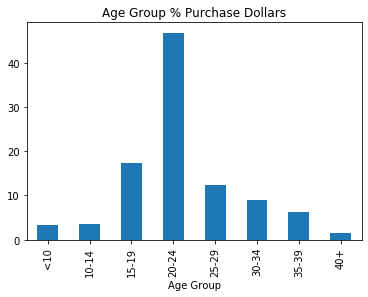

In [92]:
#set up bins and labels
bins = [0, 9, 14, 19, 24, 29,34,39,90]
bin_labels=["<10","10-14","15-19","20-24","25-29","30-34","35-39","40+"]
#create a new dataframe
age_group_df = purchase_data
age_group_df["Age Group"] = pd.cut(age_group_df["Age"], bins, labels=bin_labels)
#age_group_df=age_group_df["Age Group"] = pd.cut(purchase_data["Age"], bins, labels=bin_labels, include_lowest=True)
#do calculations
age_group_df = age_group_df.groupby("Age Group")
age_group_df_age = age_group_df["Age"].count()
age_group_df_person = age_group_df["SN"].nunique()
age_group_df_buy = age_group_df["Price"].sum()
age_group_df_avg = age_group_df["Price"].mean()
age_group_person_avg = age_group_df_buy / age_group_df_person
age_group_summary = pd.merge(age_group_df_age, age_group_df_buy, on="Age Group")
age_group_person = pd.merge(age_group_df_buy, age_group_df_person, on="Age Group")

age_group_t = pd.merge(age_group_summary, age_group_df_person, on="Age Group")
age_group_t = age_group_t.rename(columns={"Age":"Purchases","Price":"Purchased total($)","SN":"Individuals"})
age_group_t['per_person_avg'] = age_group_df_buy / age_group_df_person
age_group_t['percent']= round(100*age_group_df_buy / ttl_revenue_df,2)

age_group_t['Avg Price'] = age_group_df_buy / age_group_df_age
age_group_t["per_person_avg"] = age_group_t["per_person_avg"].map("${0:,.2f}".format)
age_group_t["Purchased total($)"]=age_group_t["Purchased total($)"].map("${0:,.2f}".format)
age_group_t["Avg Price"]=age_group_t["Avg Price"].map("${0:,.2f}".format)
dfpct = age_group_t["percent"]
age_group_t["percent"]=age_group_t["percent"].map("{0:,.2f}%".format)
#Extra -- bar chart age group with persons and purchases
print(age_group_t.head())
dfpct.plot.bar()
plt.xlabel('Age Group')
plt.title("Age Group % Purchase Dollars")

## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [9]:
#Top Spenders
top_spend_df = purchase_data.groupby("SN")

ind_buys = top_spend_df["Item ID"].count()
ind_buys.head()
ind_spend = top_spend_df["Price"].sum()
ind_spend.head()
ind_spend_avg = ind_spend / ind_buys
top_spend_summary = pd.merge(ind_buys, ind_spend, on="SN")
top_spend_summary['Avg_Spend'] = ind_spend_avg
top_spend_summary.head()
top_spend_summary_sort = top_spend_summary.sort_values("Price", ascending=False)
top_spend_summary_sort.head()
mapping = {top_spend_summary_sort.columns[0]:'Purchases', top_spend_summary_sort.columns[1]: 'Total Spend', top_spend_summary_sort.columns[2]:'Avg Spend'}
top_spend_summary_sort = top_spend_summary_sort.rename(columns=mapping)
top_spend_summary_sort = top_spend_summary_sort.rename(columns=mapping)
top_spend_summary_sort["Avg Spend"]=top_spend_summary_sort["Avg Spend"].map("${0:,.2f}".format)
top_spend_summary_sort["Total Spend"]=top_spend_summary_sort["Total Spend"].map("${0:,.2f}".format)
top_spend_summary_sort.head()

,Purchases,Total Spend,Avg Spend
SN,,,
Lisosia93,5,$18.96,$3.79
Idastidru52,4,$15.45,$3.86
Chamjask73,3,$13.83,$4.61
Iral74,4,$13.62,$3.40
Iskadarya95,3,$13.10,$4.37


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [50]:
#Most Popular
most_pop_df = purchase_data.groupby("Item Name")
ind_buys = most_pop_df["Item ID"].count()
most_value_df = most_pop_df["Price"].sum()
item_price_df = most_pop_df["Price"].mean()

most_value_df.head()

Item Name
Abyssal Shard                     13.35
Aetherius, Boon of the Blessed    16.95
Agatha                            18.48
Alpha                              6.21
Alpha, Oath of Zeal               12.15
Name: Price, dtype: float64

## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [51]:
#Most Popular
top_profit_df = pd.merge(most_value_df, ind_buys, on="Item Name")
top_profit_df['Item Price'] = item_price_df
top_profit_sort = top_profit_df.sort_values("Price", ascending=False)
mapping = {top_profit_sort.columns[0]:'Purchase_value', top_profit_sort.columns[1]: 'Total_Purchases'}
top_profit_sort = top_profit_sort.rename(columns=mapping)
dfpx = top_profit_sort
top_profit_sort['Purchase_value']=top_profit_sort["Purchase_value"].map("${0:,.2f}".format)
top_profit_sort["Item Price"]=top_profit_sort["Item Price"].map("${0:,.2f}".format)
top_profit_sort = top_profit_sort[['Total_Purchases', 'Item Price','Purchase_value']]
top_profit_sort

,Total_Purchases,Item Price,Purchase_value
Item Name,,,
Final Critic,13,$4.61,$59.99
"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
Nirvana,9,$4.90,$44.10
Fiery Glass Crusader,9,$4.58,$41.22
Singed Scalpel,8,$4.35,$34.80
...,...,...,...
"Flux, Destroyer of Due Diligence",2,$1.06,$2.12
Whistling Mithril Warblade,2,$1.00,$2.00
Exiled Mithril Longsword,1,$2.00,$2.00


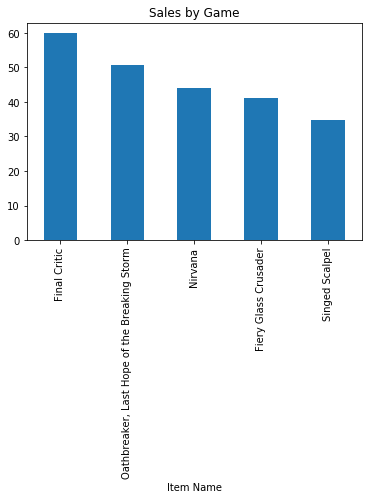

In [65]:
#Extra (Bonus) Points
# Dependencies
import numpy as np
import matplotlib.pyplot as plt
# reduce dataframe
df = top_profit_sort
%matplotlib inline
df = df.head(5)
dfp = df['Purchase_value'].apply(lambda x: float(x.replace('$',' ')))
dfp = dfp.head(5)
#show a bar chart of the most profitable
#df.plot.bar()
plt.title("Sales by Game")
dfp.plot.bar()